In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000,  high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-28.701966012992933 -92.68672284613967
-32.13063182618739 121.82408696745819
46.31125121526014 -175.878096930798
-1.3206369915235854 123.09616549360811
73.79010719763872 -27.50701222245189
-3.084599584344687 -62.546506841217834
42.2535654689616 118.31900682551606
-61.13609709684624 -122.17181237919732
59.14210329056715 -153.28086578743776
-32.26456200507939 -66.55702993190648
52.65264616731551 13.779193024004087
61.662127842609834 23.285640183750075
-70.72157612341955 102.00921229550818
29.909960841768523 -168.2391598125588
82.7350513921078 -75.68581128987643
-1.203437206278565 -87.64892990743911
78.58263582830011 -125.9054945362357
-27.85785855392404 144.23404241019796
-60.186305171218464 -115.03294456295949
61.244187159182445 89.17312833887183
53.38062350592364 -178.48951676156568
-56.071358044872056 -165.79361919085005
71.16117412216641 78.30295276406144
-65.25060451961843 -164.36386160236341
57.561107434017515 130.49427264603958
-34.62023202487767 33.14540859584119
34.6437676896232

In [5]:
# Import citipy module.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city from each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

609

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [9]:
# Import the time library and the datetime module form the datetime library.
import time
from datetime import datetime

In [10]:
# Create an emply list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retriveval     ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retriveval     
------------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | luwuk
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | codajas
Processing Record 7 of Set 1 | mujiayingzi
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | san luis
Processing Record 11 of Set 1 | strausberg
Processing Record 12 of Set 1 | nokia
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | san cristobal
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | roma
Processing Record 19 of Set 1 | teya
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | chagda
City not found. Skipping..

In [11]:
len(city_data)

556

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,44.26,82,26,2.64,CL,2022-07-16 02:29:41
1,Esperance,-33.8667,121.9000,59.63,71,100,12.59,AU,2022-07-16 02:29:41
2,Provideniya,64.3833,-173.3000,50.52,60,45,6.62,RU,2022-07-16 02:29:42
3,Luwuk,-0.9516,122.7875,78.30,86,100,6.51,ID,2022-07-16 02:29:42
4,Codajas,-3.8367,-62.0569,77.54,81,76,3.33,BR,2022-07-16 02:29:42
5,Mujiayingzi,42.1167,118.7833,74.82,65,91,4.97,CN,2022-07-16 02:29:43
6,Rikitea,-23.1203,-134.9692,67.68,87,100,13.24,PF,2022-07-16 02:29:43
7,Kodiak,57.7900,-152.4072,62.11,72,100,3.44,US,2022-07-16 02:29:44
8,San Luis,-33.2950,-66.3356,35.56,97,100,8.43,AR,2022-07-16 02:25:58
9,Strausberg,52.5786,13.8874,61.66,80,100,6.26,DE,2022-07-16 02:29:44


In [13]:
new_columns_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_columns_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2022-07-16 02:29:41,-37.6167,-73.6500,44.26,82,26,2.64
1,Esperance,AU,2022-07-16 02:29:41,-33.8667,121.9000,59.63,71,100,12.59
2,Provideniya,RU,2022-07-16 02:29:42,64.3833,-173.3000,50.52,60,45,6.62
3,Luwuk,ID,2022-07-16 02:29:42,-0.9516,122.7875,78.30,86,100,6.51
4,Codajas,BR,2022-07-16 02:29:42,-3.8367,-62.0569,77.54,81,76,3.33


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

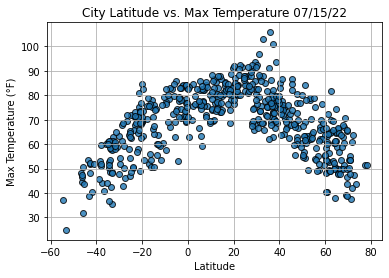

In [18]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

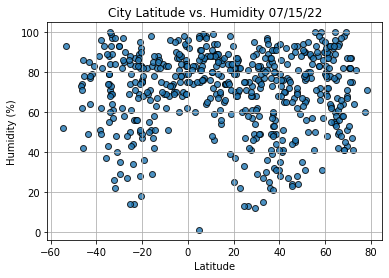

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

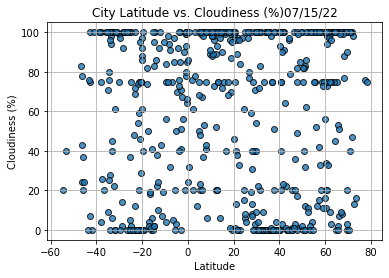

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

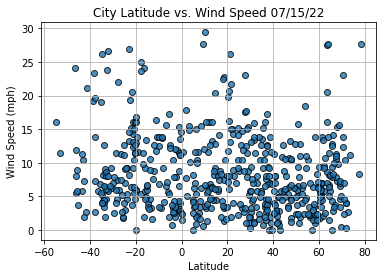

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2022-07-16 02:29:45
Lat                        77.484
Lng                      -69.3632
Max Temp                     51.3
Humidity                       60
Cloudiness                     76
Wind Speed                    8.3
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
551    False
552    False
553    False
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Provideniya,RU,2022-07-16 02:29:42,64.3833,-173.3000,50.52,60,45,6.62
5,Mujiayingzi,CN,2022-07-16 02:29:43,42.1167,118.7833,74.82,65,91,4.97
7,Kodiak,US,2022-07-16 02:29:44,57.7900,-152.4072,62.11,72,100,3.44
9,Strausberg,DE,2022-07-16 02:29:44,52.5786,13.8874,61.66,80,100,6.26
10,Nokia,FI,2022-07-16 02:29:44,61.4667,23.5000,52.57,93,100,6.91


In [27]:
# Create Northern and Southern Hemisphare DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

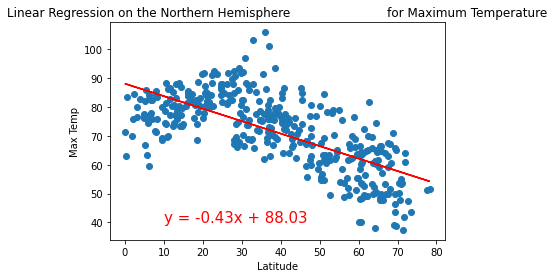

In [30]:
# Linear regression on the Northern Hemisphare.
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_value, y_value,
                        'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

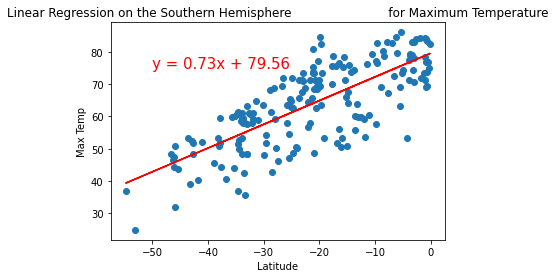

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,75))

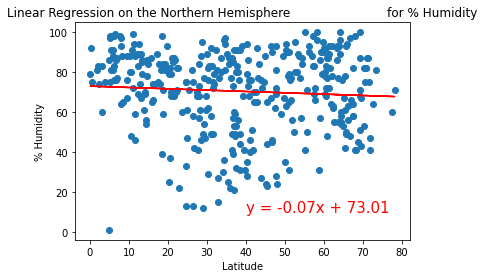

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

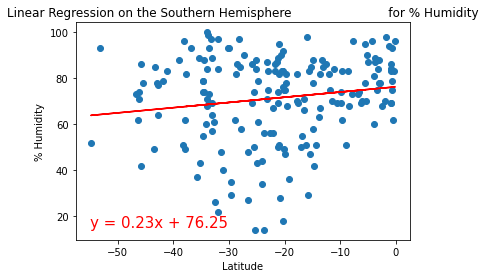

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,15))

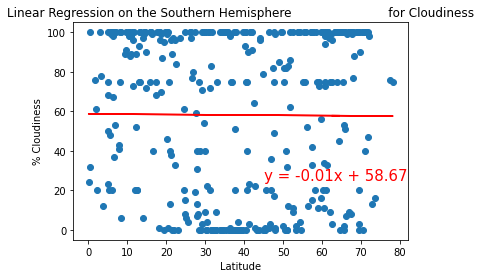

In [51]:
# Linear regression on the Nouthern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', '% Cloudiness',(45,25))

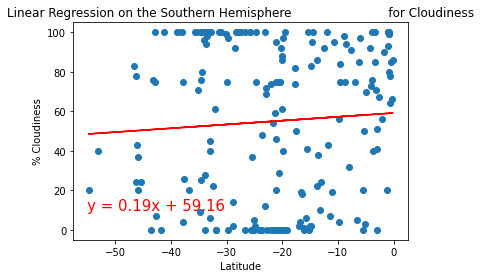

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', '% Cloudiness',(-55,10))

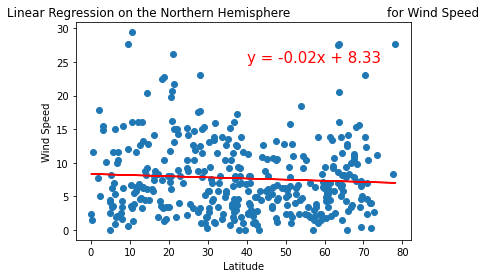

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

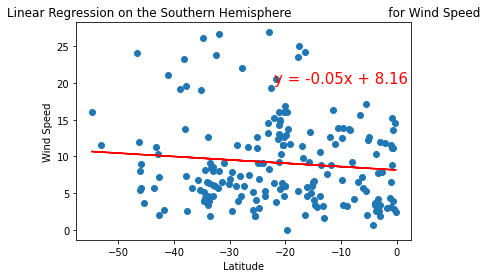

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-22, 20))